# Importing Packages

In [28]:
import numpy as np
import pandas as pd
from matplotlib.pyplot import subplots

import statsmodels.api as sm

from statsmodels.stats.outliers_influence \
    import variance_inflation_factor as VIF
from statsmodels.stats.anova import anova_lm

from ISLP import load_data
from ISLP.models import (ModelSpec as MS,
                        summarize,
                        poly)

# Inspecting Objects and Namespaces

In [4]:
dir() # Lists 0bjects in NameSpace

['ISLP',
 'In',
 'MS',
 'Out',
 'VIF',
 '_',
 '__',
 '___',
 '__builtin__',
 '__builtins__',
 '__doc__',
 '__loader__',
 '__name__',
 '__package__',
 '__session__',
 '__spec__',
 '_dh',
 '_i',
 '_i1',
 '_i2',
 '_i3',
 '_i4',
 '_ih',
 '_ii',
 '_iii',
 '_oh',
 'anova_lm',
 'exit',
 'get_ipython',
 'load_data',
 'np',
 'open',
 'pd',
 'poly',
 'quit',
 'sm',
 'subplots',
 'summarize']

In [5]:
A = np.array([3,5,11])
dir(A) # Lists all numpy functions that can be used on a np array

['T',
 '__abs__',
 '__add__',
 '__and__',
 '__array__',
 '__array_finalize__',
 '__array_function__',
 '__array_interface__',
 '__array_prepare__',
 '__array_priority__',
 '__array_struct__',
 '__array_ufunc__',
 '__array_wrap__',
 '__bool__',
 '__class__',
 '__class_getitem__',
 '__complex__',
 '__contains__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dir__',
 '__divmod__',
 '__dlpack__',
 '__dlpack_device__',
 '__doc__',
 '__eq__',
 '__float__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__ifloordiv__',
 '__ilshift__',
 '__imatmul__',
 '__imod__',
 '__imul__',
 '__index__',
 '__init__',
 '__init_subclass__',
 '__int__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__irshift__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__lshift__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__or__',
 '__pos__',

In [6]:
A.sum? # Returns help code explaining the function and syntax

Docstring:
a.sum(axis=None, dtype=None, out=None, keepdims=False, initial=0, where=True)

Return the sum of the array elements over the given axis.

Refer to `numpy.sum` for full documentation.

See Also
--------
numpy.sum : equivalent function
Type:      builtin_function_or_method

In [7]:
A.sum()

19

# Simple Linear Regression

In [15]:
Boston = load_data("Boston")
Boston.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'lstat', 'medv'],
      dtype='object')

We first want to fit a SLR model, medv ~ lstat

In [17]:
#Constructing model matrix by hand

X = pd.DataFrame({'intercept': np.ones(Boston.shape[0]),
                 'lstat': Boston['lstat']})
X[:4]

,intercept,lstat
0,1.0,4.98
1,1.0,9.14
2,1.0,4.03
3,1.0,2.94


In [29]:
y = Boston['medv'] # Response is medv column in Boston df
model = sm.OLS(y,X) # Specifies model with OLS estimator, y on X (Where is x is X matrix)
results = model.fit() # Fits model, model is not fit by sm.OLS just specified
summarize(results) # Views output in r-style coefficient table, part of ISLP function

,coef,std err,t,P>|t|
intercept,34.5538,0.563,61.415,0.0
lstat,-0.9500,0.039,-24.528,0.0


# Using Transformations: Fit and Transform

- Above, we fit a single predictor
- For modeling multiple predictors, we may want to introduce transformations such as interactions, etc
- *sklearn* package allows us to do these transofmrations, mainly with `fit()` and `transform()`
- `ModelSpec()` or `MS()` in the *ISLP* library allows us to create a transform object, and then apply transformations to construct a model matrix

In [30]:
design = MS(['lstat']) # Transform created
design = design.fit(Boston) # In this case, just checking that `lstat` variable specified in `design` exists in `Boston`
X = design.transform(Boston) # Constructs model matrix with two cols: Intercept and variable lstat
X[:4]

,intercept,lstat
0,1.0,4.98
1,1.0,9.14
2,1.0,4.03
3,1.0,2.94


In [31]:
# Consolidating the fit() and transform() functions from earlier, we can re-write it as
design = MS(['lstat'])
X = design.fit_transform(Boston)
X[:4]

,intercept,lstat
0,1.0,4.98
1,1.0,9.14
2,1.0,4.03
3,1.0,2.94


In [32]:
results.summary() # Shows full summary of fit

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Tue, 24 Dec 2024   Prob (F-statistic):           5.08e-88
Time:                        15:48:52   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     34.5538      0.563     61.415      0.000      33.448      35.659
lstat         -0.9500      0.039    -24.528      0.000      -1.026      -0.874
==============================================================================
Omnibus:                      137.043   Durbin-Watson:                   0.892
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              291.373
Skew:                           1.453   Prob(JB):                     5.36e-64
Kurtosis:                       5.319   Cond. No.                         29.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [33]:
results.params # Just returns coefficient values

intercept    34.553841
lstat        -0.950049
dtype: float64

- `.get_prediction` can be used to obtain predictions and construct confidence intervals and PIs for prediction of medv given values of lstat

In [34]:
new_df = pd.DataFrame({'lstat':[5, 10, 15]})
newX = design.transform(new_df)
newX

,intercept,lstat
0,1.0,5
1,1.0,10
2,1.0,15


In [41]:
new_predictions = results.get_prediction(newX)
new_predictions.predicted_mean

array([29.80359411, 25.05334734, 20.30310057])

In [46]:
new_predictions.conf_int(obs = True, alpha = .05) # Toggle obs=True to make it a PI, false to make it a CI

array([[17.56567478, 42.04151344],
       [12.82762635, 37.27906833],
       [ 8.0777421 , 32.52845905]])

# Defining Functions

In [48]:
def abline(ax, b, m, *args, **kwargs): # Optional arguments in call after *
    "Add a line with a slope m and intercept b to ax"
    xlim = ax.get_xlim()
    ylim = [m * xlim[0] + b, m * xlim[1] + b]
    ax.plot(xlim, ylim)
    ax.plot(xlim, ylim, *args, **kwargs)

/var/folders/gr/wvbk2v7n13x11gx1l9h1b84h0000gq/T/ipykernel_33760/1908951092.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  results.params[0],
/var/folders/gr/wvbk2v7n13x11gx1l9h1b84h0000gq/T/ipykernel_33760/1908951092.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  results.params[1],


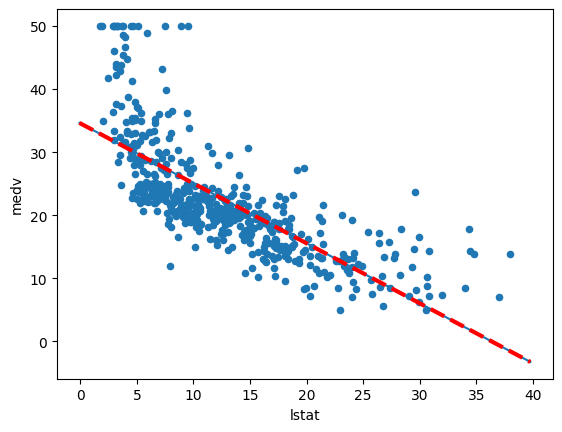

In [49]:
ax = Boston.plot.scatter('lstat','medv')
abline(ax,
      results.params[0],
      results.params[1],
      'r--',
      linewidth = 3)